In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Load Data and see what is in it

In [0]:
import pandas as pd
import numpy as np

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/data/'
data = pd.read_csv(data_path+'fer2013.csv') 
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [0]:
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

# from DataFrame to Numpy

In [0]:
train_data = data[data.Usage=='Training']
public_test_data = data[data.Usage=='PublicTest']
private_test_data = data[data.Usage=='PrivateTest']

In [0]:
train_data = {'x':train_data['pixels'].values,'y':train_data['emotion'].values}
public_test_data = {'x':public_test_data['pixels'].values,'y':public_test_data['emotion'].values}
private_test_data = {'x':private_test_data['pixels'].values,'y':private_test_data['emotion'].values}

In [0]:
for i in range(len(train_data['x'])):
  train_data['x'][i]=np.fromstring(train_data['x'][i],sep=' ')
train_data['x'] = np.vstack(train_data['x']).reshape(-1,48,48,1)/255.0

for i in range(len(public_test_data['x'])):
  public_test_data['x'][i]=np.fromstring(public_test_data['x'][i],sep=' ')
public_test_data['x'] = np.vstack(public_test_data['x']).reshape(-1,48,48,1)/255.0

for i in range(len(private_test_data['x'])):
  private_test_data['x'][i]=np.fromstring(private_test_data['x'][i],sep=' ')
private_test_data['x'] = np.vstack(private_test_data['x']).reshape(-1,48,48,1)/255.0

train_data['x'].shape

(28709, 48, 48, 1)

In [0]:
train_data['x'][0,:,:,0]

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157, 0.16862745,
        0.16078431],
       [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294, 0.21960784,
        0.16862745],
       [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471, 0.2745098 ,
        0.18039216],
       [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627, 0.42745098,
        0.32156863]])

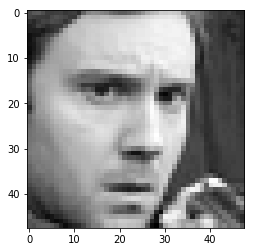

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_data['x'][0,:,:,0],cmap='gray')

In [0]:
from keras.utils import to_categorical
train_data['y'] = to_categorical(train_data['y'],num_classes=7)
public_test_data['y'] = to_categorical(public_test_data['y'],num_classes=7)
private_test_data['y'] = to_categorical(private_test_data['y'],num_classes=7)

Using TensorFlow backend.


# Save processed data

In [0]:
import pickle
with open(data_path+'FER2013.train_data.pickle','wb') as fp:
  pickle.dump(train_data,fp)
with open(data_path+'FER2013.public_test_data.pickle','wb') as fp:
  pickle.dump(public_test_data,fp)
with open(data_path+'FER2013.private_test_data.pickle','wb') as fp:
  pickle.dump(private_test_data,fp)  